In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis of Video Game Sales Across different Regions and Globally

Loading the Dataset, taken from (https://www.kaggle.com/datasets/kedokedokedo/vgsales/)

In [19]:
df = pd.read_csv('archive/vgsales.csv')
df = df.sort_values(by = 'Rank')

Dataset Description

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16324 entries, 6112 to 4407
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


All sales are represented as approximate number of units sold (in millions)

In [21]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6112,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
122,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8322,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
9750,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
705,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
df.shape

(16324, 11)

# Data Cleanup

Cleaning Null Value Rows/Columns

In [23]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [24]:
df[df['Publisher'].isnull() == True]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7231,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,NaN,0.87,0.32,0.00,0.02,1.21
5271,2224,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.00,0.02,0.93
4569,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0.00,0.01,0.64
4570,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.46,0.17,0.00,0.01,0.64
4605,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4653,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4664,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.30,0.11,0.00,0.01,0.42
5471,5649,Cartoon Network Collection: Game Boy Advance V...,GBA,2005,Misc,NaN,0.23,0.08,0.00,0.01,0.32
4734,6439,Sonic X: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.19,0.07,0.00,0.00,0.27
4741,6564,Dora the Explorer: Game Boy Advance Video Volu...,GBA,2004,Misc,NaN,0.18,0.07,0.00,0.00,0.26


In [25]:
df = df[df['Publisher'].isnull() == False]
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16288 entries, 6112 to 4407
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16288 non-null  int64  
 1   Name          16288 non-null  object 
 2   Platform      16288 non-null  object 
 3   Year          16288 non-null  int64  
 4   Genre         16288 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16288 non-null  float64
 7   EU_Sales      16288 non-null  float64
 8   JP_Sales      16288 non-null  float64
 9   Other_Sales   16288 non-null  float64
 10  Global_Sales  16288 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Total Number of units sold per Year for Each Region

In [73]:
yearly_sales = df.groupby('Year').sum().iloc[:,1:]
yearly_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.77
1982,26.92,1.65,0.00,0.31,28.86
1983,7.76,0.80,8.10,0.14,16.79
1984,33.28,2.10,14.27,0.70,50.36
1985,33.73,4.74,14.56,0.92,53.94
1986,12.50,2.84,19.81,1.93,37.07
1987,8.46,1.41,11.63,0.20,21.74
1988,23.87,6.59,15.76,0.99,47.22


Representing Regional Sales per Year Graphically

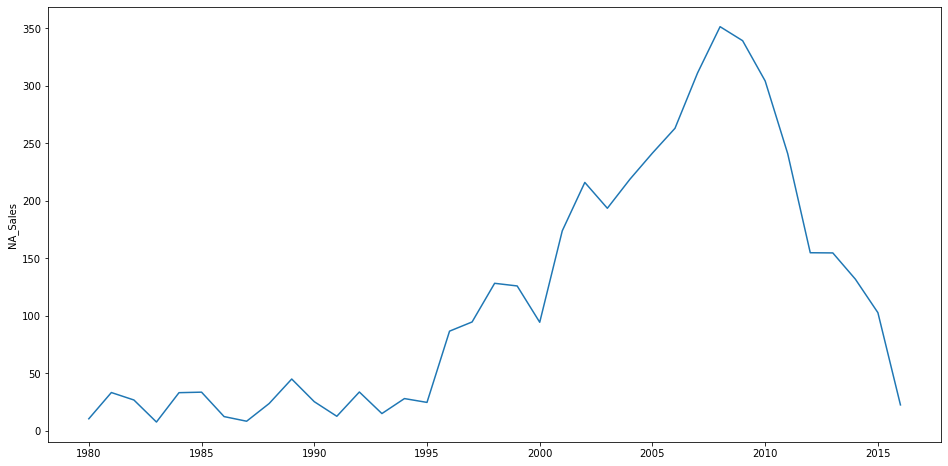

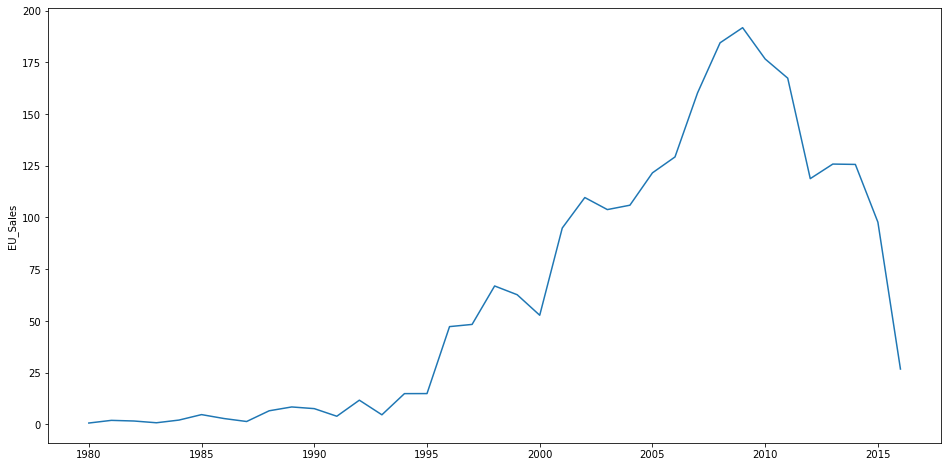

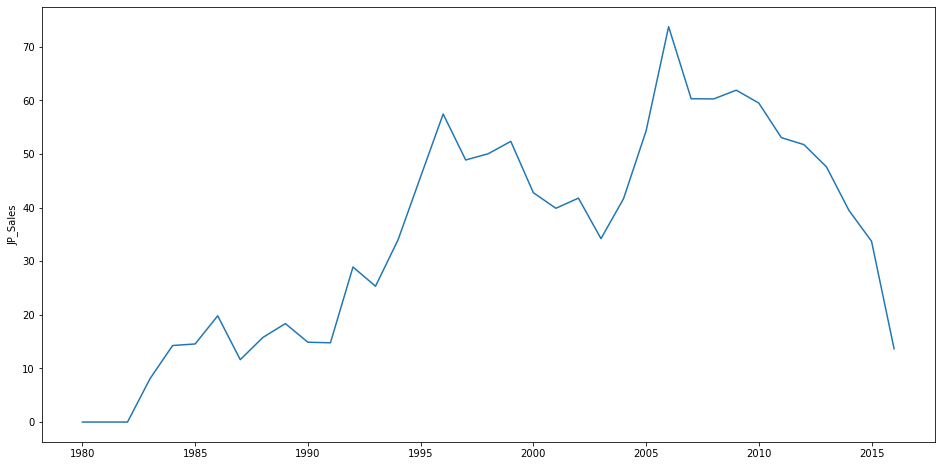

In [29]:
for i in yearly_sales.columns[1:-2]:
    plt.figure(figsize = (16,8))
    sns.lineplot(x = np.arange(1980, 2017), y = i, data = yearly_sales)
    plt.show()

# Total Units Sold by Genre

In [75]:
sales_by_genre = df.groupby('Genre').sum().iloc[:,2:]
sales_by_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.64,184.92,1722.83
Adventure,101.93,63.74,51.99,16.70,234.59
Fighting,220.74,100.00,87.15,36.19,444.05
Misc,396.92,211.77,106.67,73.92,789.87
Platform,445.99,200.65,130.65,51.51,829.13
Puzzle,122.01,50.52,56.68,12.47,242.21
Racing,356.93,236.31,56.61,76.68,726.76
Role-Playing,326.50,187.57,350.25,59.38,923.79
Shooter,575.16,310.45,38.18,101.90,1026.20


Representing Units sold by Genre for Each Region Graphically

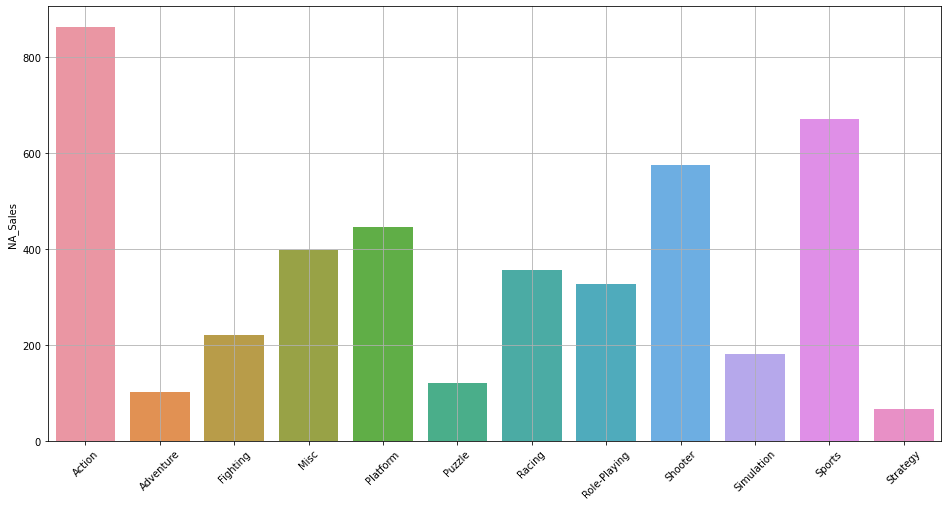

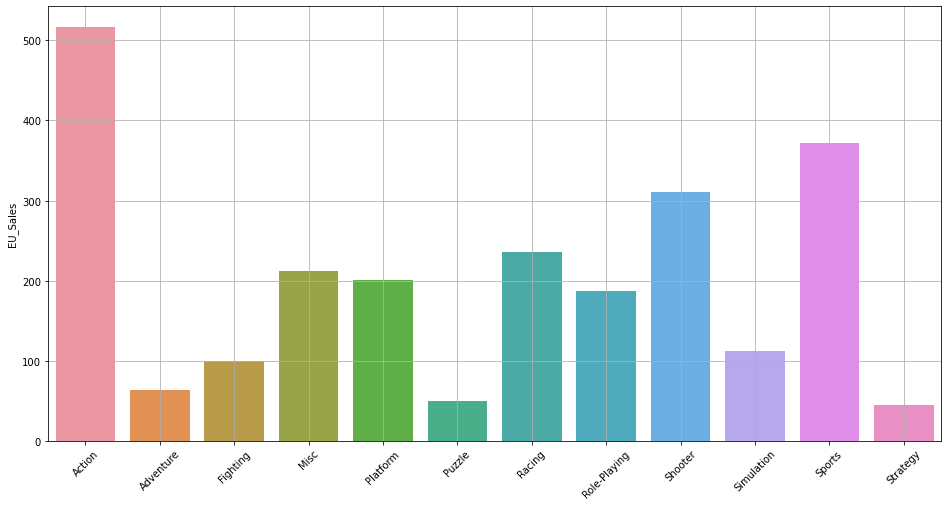

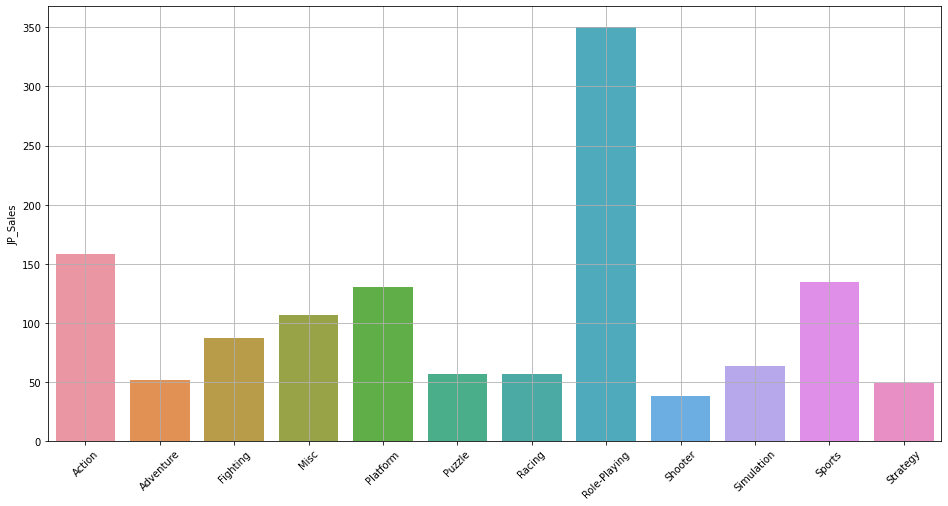

In [32]:
for i in sales_by_genre.columns[2:-2]:
    genre_list = sales_by_genre.index.values.tolist()
    plt.figure(figsize = (16,8))
    sns.barplot(x = [i for i in range(len(genre_list))], y = i, data = sales_by_genre)
    plt.xticks(ticks = [i for i in range(len(genre_list))], labels = genre_list, rotation = 45)
    plt.grid(True)
    plt.show()

What is the most Popular Genre for each Region?

In [39]:
for i in sales_by_genre.columns[2:-2]:
    popular_genre = sales_by_genre.index[sales_by_genre[i] == sales_by_genre[i].max()][0]
    max_sales_for_region = sales_by_genre[i].max()
    print(f"Most popular genre in {i[:2]} is {popular_genre}, with {max_sales_for_region} sales")

Most popular genre in NA is Action, with 861.7699999999918 sales
Most popular genre in EU is Action, with 516.4799999999883 sales
Most popular genre in JP is Role-Playing, with 350.24999999999795 sales


What are the most popular genres globally?

In [78]:
sales_by_genre.sort_values(by = 'Global_Sales', ascending = False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.64,184.92,1722.83
Sports,670.09,371.34,134.76,132.65,1309.24
Shooter,575.16,310.45,38.18,101.90,1026.20
Role-Playing,326.50,187.57,350.25,59.38,923.79
Platform,445.99,200.65,130.65,51.51,829.13
Misc,396.92,211.77,106.67,73.92,789.87
Racing,356.93,236.31,56.61,76.68,726.76
Fighting,220.74,100.00,87.15,36.19,444.05
Simulation,181.78,113.02,63.54,31.36,389.98


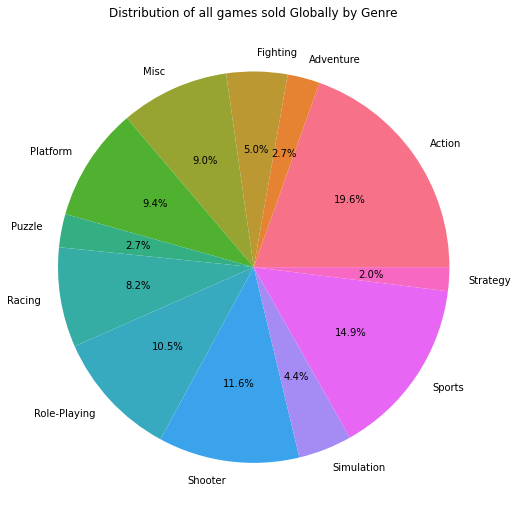

In [104]:
labels = sales_by_genre.index.values.tolist()
data = sales_by_genre['Global_Sales']
colors = sns.color_palette('husl',12)
plt.figure(figsize = (16,9))
plt.title("Distribution of all games sold Globally by Genre")
plt.pie(data, labels = labels, colors = colors, autopct="%.1f%%")
plt.show()

# Total Units sold by Publisher

In [80]:
sales_by_publisher = df.groupby('Publisher').sum().iloc[:,2:]
sales_by_publisher.sort_values(by = 'Global_Sales', ascending = False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54
...,...,...,...,...,...
Epic Games,0.01,0.00,0.00,0.00,0.01
Paradox Development,0.00,0.01,0.00,0.00,0.01
Rain Games,0.00,0.01,0.00,0.00,0.01


Who were the most popular publishers in each region?

In [56]:
for i in sales_by_publisher.columns[2:-2]:
    print(f"For {i[:2]}:")
    print(sales_by_publisher[i].sort_values(ascending = False).head())
    print()

For NA:
Publisher
Nintendo                       815.75
Electronic Arts                584.22
Activision                     426.01
Sony Computer Entertainment    265.22
Ubisoft                        252.81
Name: NA_Sales, dtype: float64

For EU:
Publisher
Nintendo                       418.30
Electronic Arts                367.38
Activision                     213.72
Sony Computer Entertainment    187.55
Ubisoft                        163.03
Name: EU_Sales, dtype: float64

For JP:
Publisher
Nintendo                        454.99
Namco Bandai Games              126.84
Konami Digital Entertainment     90.93
Sony Computer Entertainment      74.10
Capcom                           67.38
Name: JP_Sales, dtype: float64



# Total Units sold by Platform

In [81]:
sales_by_platform = df.groupby('Platform').sum().iloc[:,2:]
sales_by_platform.sort_values('Global_Sales', ascending = False).head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.46
X360,594.33,278.00,12.30,84.67,969.60
PS3,388.90,340.47,79.21,140.81,949.35
Wii,497.37,264.35,68.28,79.20,909.81
DS,388.53,194.05,175.02,60.29,818.91


On which Platforms did the most amount of sales occur in each region?

In [61]:
for i in sales_by_platform.columns[2:-2]:
    print(f"For {i[:2]}:")
    print(sales_by_platform[i].sort_values(ascending = False).head())
    print()

For NA:
Platform
X360    594.33
PS2     572.92
Wii     497.37
PS3     388.90
DS      388.53
Name: NA_Sales, dtype: float64

For EU:
Platform
PS3     340.47
PS2     332.63
X360    278.00
Wii     264.35
PS      212.38
Name: EU_Sales, dtype: float64

For JP:
Platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
NES      98.65
Name: JP_Sales, dtype: float64



# Observations

Some interesting observations can be made when considering the data relevant to the Japanese Region. Nintendo is a Japanese Video Game company which has published games which are consistently the most popular across all regions. Nintendo is also the creator of video-game platforms such as the Wii, DS, NES and SNES which are all amongst the top most popular platforms across all regions. It can also be observed that all of the top 5 publishers for the Japanese Region are Japanese Companies with some of those companies such as Nintendo and Sony also being in the top publishers for other regions as well. However, even though there are multiple Japanese Companies which have dominated the video-game industry for decades, those companies have found their markets within other regions and the popularity of video-games in Japan still severely lacks behind North America and Europe in terms of sales.